In [1]:
!pip install torchvision torch 

  Using cached torch-2.7.1-cp310-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00a 0:00:01
Using cached torch-2.7.1-cp310-none-macosx_11_0_arm64.whl (68.6 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.5.1-py3-none-any.whl (199 kB)
Using cache

In [2]:
import os
import torch
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
# Define image transforms (must match what you used earlier)
IMG_SIZE = 224
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),  # Add some augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [4]:
# If you run the script from IntelliShelf/, Path.cwd() gives that directory.
data_root = (Path.cwd() / ".." / "dataset").resolve()
# train_dir  = data_root / "train"
# val_dir    = data_root / "val"



In [6]:
print(data_root)

/Users/yash/Library/IntelliShelf/dataset


In [8]:
# Create datasets
train_dataset = datasets.ImageFolder(os.path.join(data_root, "train"), transform=train_transform)
val_dataset = datasets.ImageFolder(os.path.join(data_root, "val"), transform=val_transform)

In [9]:
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

In [10]:
# Print class names
print("Class indices:", train_dataset.class_to_idx)

Class indices: {'pants': 0, 'shoes': 1, 'tshirts': 2}


In [13]:
!pip install matplotlib

  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.9 MB/s eta 0:00:00ta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


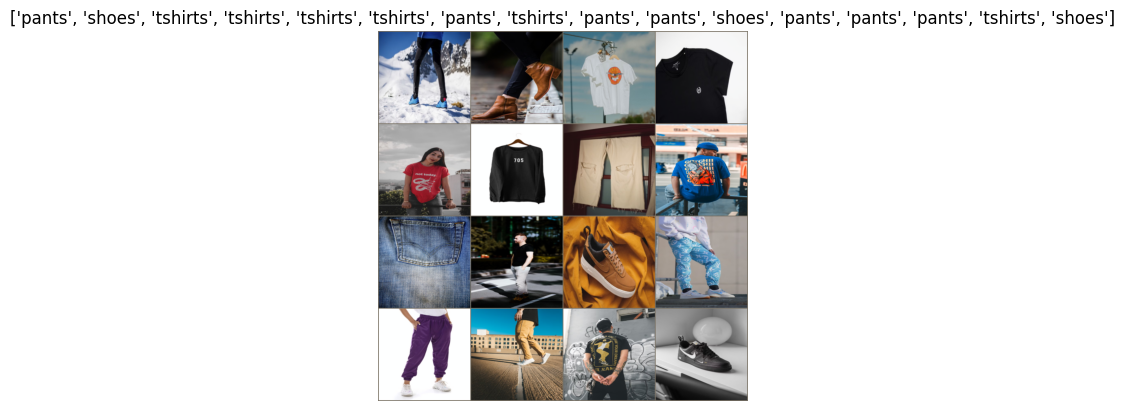

In [15]:
import matplotlib.pyplot as plt
import torchvision

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))  # CHW → HWC
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    inp = std * inp + mean  # Unnormalize
    inp = inp.clip(0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.axis('off')

# Get a batch
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow=4)

imshow(out, title=[train_dataset.classes[c] for c in classes])


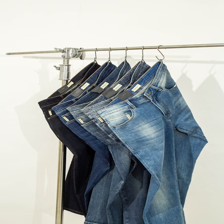

In [21]:
from PIL import Image

img_path = data_root / "train/pants/pants7.jpg"

# Open and show image
img = Image.open(img_path)

# Resize the image
resized_img = img.resize((224, 224))  # (width, height)

display(resized_img)